<a href="https://colab.research.google.com/github/lucianarpo14/uncertaintyproject/blob/main/proyectodegrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos1 = pd.read_excel("/content/drive/My Drive/base300ohms2.xlsx")
datos2 = pd.read_excel("/content/drive/My Drive/base500ohms2.xlsx")
datos3 = pd.read_excel("/content/drive/My Drive/base100ohms2.xlsx")


In [ ]:
datos1_df = pd.DataFrame(datos1)
datos2_df = pd.DataFrame(datos2)
datos3_df = pd.DataFrame(datos3)

# LIMPIEZA DATOS ATÍPICOS

In [ ]:
  # Cargar los datos
def cargar_datos(ruta):
    try:
        return pd.read_excel(ruta)
    except Exception as e:
        print(f"Error al cargar el archivo {ruta}: {e}")
        return None

# Verificar que los datos se cargaron correctamente
if datos1 is None or datos2 is None or datos3 is None:
    print("Error: No se pudieron cargar correctamente los archivos. Revisa las rutas y los archivos.")
else:
    # Eliminar la fila 12 (índice 11) de la base100ohms2
    datos3_sin_fila12 = datos3.drop(index=12)

    # Función para limpiar valores atípicos y mostrar los valores atípicos
    def limpiar_y_guardar_atipicos(df, nombre_base):
        if df is None:
            print(f"Error: {nombre_base} no es un DataFrame válido.")
            return None, None

        # Seleccionar solo las columnas numéricas
        df_numerico = df.select_dtypes(include=[float, int])

        # Calcular Q1, Q3 y el IQR (Rango Intercuartílico) para las columnas numéricas
        Q1 = df_numerico.quantile(0.25)
        Q3 = df_numerico.quantile(0.75)
        IQR = Q3 - Q1

        # Detectar valores atípicos
        outliers = df[((df_numerico < (Q1 - 1.5 * IQR)) | (df_numerico > (Q3 + 1.5 * IQR))).any(axis=1)]

        # Eliminar valores atípicos
        df_clean = df[~((df_numerico < (Q1 - 1.5 * IQR)) | (df_numerico > (Q3 + 1.5 * IQR))).any(axis=1)]

        # Mostrar los valores atípicos
        if not outliers.empty:
            print(f"Valores atípicos detectados en {nombre_base}:")
            print(outliers)
        else:
            print(f"No se encontraron valores atípicos en {nombre_base}.")

        return df_clean, outliers

    # Limpiar las tres bases de datos y mostrar los valores atípicos
    datos1_limpio, outliers1 = limpiar_y_guardar_atipicos(datos1, "base300ohms2")
    datos2_limpio, outliers2 = limpiar_y_guardar_atipicos(datos2, "base500ohms2")
    datos3_limpio, outliers3 = limpiar_y_guardar_atipicos(datos3_sin_fila12, "base100ohms2")

print("Proceso completado.")


No se encontraron valores atípicos en base300ohms2.
No se encontraron valores atípicos en base500ohms2.
Valores atípicos detectados en base100ohms2:
   BIO-14879 Primer semestre   BIO-14879 segundo semestre   \
5                        76.4                         83.0   

   BIO-14878 primer semestre  BIO-14878 segundo semestre  \
5                       83.6                        80.4   

   BIO-14920 primer semestre  BIO-14920 segundo semestre  \
5                       88.9                        64.3   

   BIO-14673 primer semestre  BIO-14673 segundo semestre  \
5                      114.5                        60.9   

   BIO-14741 primer semestre  BIO-14741 segundo semestre  ...  \
5                      105.9                       107.0  ...   

   BIO-14743 segundo semestre  BIO-14669 primer semestre  \
5                        61.5                      112.2   

   BIO-14669 segundo semestre  BIO-14671 primer semestre  \
5                        69.6                      

# VALORES DE ERROR DE CADA UNA DE LAS BASES DE DATOS

PARA BASE CON IMPEDANCIA 100 OHMS

In [ ]:
#valores de error para base 300
def errorbase100(df):
    # Lista de valores a restar para cada fila (11 valores en total)
    restas = [20, 50, 70, 90, 100, 30, 60, 30, 60, 30, 60]

    # Recorremos las filas de la base de datos
    for i in range(len(restas)):
        # A cada valor en la fila i, restamos el valor correspondiente de la lista
        df.iloc[i, :] = df.iloc[i, :] - restas[i]

    return df

# Aplicar la función error
df_modificado100 = errorbase100(datos3)

# Guardar el DataFrame modificado si lo deseas
df_modificado100.to_excel("base300ohms2_modificado.xlsx", index=False)

#Aplicar valor absoluto para ver los resultados en valores positivos
df_positivo100= df_modificado100.abs()

# Mostrar los primeros registros del DataFrame modificado
print(df_positivo100)

    BIO-14879 Primer semestre   BIO-14879 segundo semestre   \
0                          7.7                         19.1   
1                          7.2                         36.2   
2                         24.2                         28.4   
3                         19.3                         17.7   
4                         21.2                         18.0   
5                         46.4                         53.0   
6                         34.2                         32.2   
7                         25.9                         26.4   
8                         31.5                         32.1   
9                         28.3                         25.8   
10                        31.7                         32.2   
11                        54.9                         56.4   
12                       117.0                        119.0   

    BIO-14878 primer semestre  BIO-14878 segundo semestre  \
0                        19.0                        19.

PARA BASE CON IMPEDANCIA DE 300 OHMS

In [ ]:
#valores de error para base 300
def errorbase300(df):
    # Lista de valores a restar para cada fila (11 valores en total)
    restas = [20, 50, 100, 150, 200, 250, 20, 50, 100, 150, 200]

    # Recorremos las filas de la base de datos
    for i in range(len(restas)):
        # A cada valor en la fila i, restamos el valor correspondiente de la lista
        df.iloc[i, :] = df.iloc[i, :] - restas[i]

    return df

# Aplicar la función error
df_modificado300 = errorbase300(datos1)

# Guardar el DataFrame modificado si lo deseas
df_modificado300.to_excel("base300ohms2_modificado.xlsx", index=False)

#Aplicar valor absoluto para ver los resultados en valores positivos
df_positivo300= df_modificado300.abs()

# Mostrar los primeros registros del DataFrame modificado
print(df_positivo300)


    BIO-14879 Primer semestre   BIO-14879 segundo semestre   \
0                          2.5                          2.5   
1                          5.8                          5.8   
2                          9.5                          9.5   
3                         14.0                         14.0   
4                         18.0                         18.0   
5                         13.0                         13.0   
6                          2.7                          2.7   
7                          4.8                          4.8   
8                          9.3                          9.3   
9                         14.0                         14.0   
10                        18.0                         18.0   

    BIO-14878 primer semestre  BIO-14878 segundo semestre  \
0                         1.5                         2.8   
1                         4.8                         5.0   
2                         6.5                         7.7   

PARA BASE CON IMPEDANCIA DE 500 OHMS

In [ ]:
#valores de error para base 500
def errorbase500(df):
    # Lista de valores a restar para cada fila (12 valores en total)
    restas = [20, 50, 70, 90, 100, 120, 120, 100, 90, 70, 50, 20]

    # Recorremos las filas de la base de datos
    for i in range(len(restas)):
        # A cada valor en la fila i, restamos el valor correspondiente de la lista
        df.iloc[i, :] = df.iloc[i, :] - restas[i]

    return df

# Aplicar la función error
df_modificado500 = errorbase500(datos2)

# Guardar el DataFrame modificado si lo deseas
df_modificado500.to_excel("base500ohms2_modificado.xlsx", index=False)

#Aplicar valor absoluto para ver los resultados en valores positivos
df_positivo500= df_modificado500.abs()

# Mostrar los primeros registros del DataFrame modificado
print(df_positivo500)


    BIO-14879 Primer semestre   BIO-14879 segundo semestre   \
0                          1.8                          1.4   
1                          3.5                          2.5   
2                          1.7                          4.4   
3                          7.2                          5.6   
4                          8.1                          6.2   
5                          6.0                          7.0   
6                         10.0                          7.0   
7                          3.7                          6.3   
8                          4.7                          5.7   
9                          6.8                          4.4   
10                         8.4                          2.5   
11                         1.7                          1.1   

    BIO-14878 primer semestre  BIO-14878 segundo semestre  \
0                         4.0                         1.3   
1                         2.0                         2.2 

# CUMPLIMIENTO DEL ERROR MÁXIMO PERMITIDO SEGÚN EL FABRICANTE

PARA BASE DE DATOS DE 100 OHMS

In [ ]:

# Función para verificar si los valores cumplen el 15% de margen de error
def verificar_cumplimiento(df_positivo100):
    # Lista de valores de referencia (13 valores en total)
    restas = [20, 50, 70, 90, 100, 30, 60, 30, 60, 30, 60]

    # Crear un DataFrame para almacenar los resultados de 'Cumple' o 'No cumple'
    resultados_df = pd.DataFrame(index=df.index, columns=df.columns)

    # Recorremos las filas y columnas de la base de datos
    for i in range(len(restas)):
        valor_referencia = restas[i]
        limite_inferior = valor_referencia * 0.85  # 85% del valor de referencia
        limite_superior = valor_referencia * 1.15  # 115% del valor de referencia

        for j in range(df.shape[1]):
            valor_medido = df.iloc[i, j]

            # Comprobar si el valor está dentro del rango permitido
            if limite_inferior <= valor_medido <= limite_superior:
                resultados_df.iloc[i, j] = 'Cumple'
            else:
                resultados_df.iloc[i, j] = 'No cumple'

    return resultados_df

# Cargar la base de datos
file_path = "/content/drive/My Drive/base100ohms2.xlsx"
df = pd.read_excel(file_path)

df = df_positivo100.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_cleaned = df_positivo100.dropna()


# Aplicar la función de verificación de cumplimiento en el DataFrame limpio
resultados_cumplimiento100 = verificar_cumplimiento(df_cleaned)

# Mostrar los resultados
print(resultados_cumplimiento100)

   BIO-14879 Primer semestre  BIO-14879 segundo semestre   \
0                   No cumple                      Cumple   
1                   No cumple                   No cumple   
2                   No cumple                   No cumple   
3                   No cumple                   No cumple   
4                   No cumple                   No cumple   
5                   No cumple                   No cumple   
6                   No cumple                   No cumple   
7                      Cumple                      Cumple   
8                   No cumple                   No cumple   
9                      Cumple                      Cumple   
10                  No cumple                   No cumple   
11                        NaN                         NaN   
12                        NaN                         NaN   

   BIO-14878 primer semestre BIO-14878 segundo semestre  \
0                     Cumple                     Cumple   
1                  No cumpl

PARA BASE DE 300 OMHS

In [ ]:
# Función para verificar si los valores cumplen el 15% de margen de error
def verificar_cumplimiento(df_positivo300):
    # Lista de valores de referencia (13 valores en total)
    restas = [20, 50, 100, 150, 200, 250, 20, 50, 100, 150, 200]
    # Crear un DataFrame para almacenar los resultados de 'Cumple' o 'No cumple'
    resultados_df = pd.DataFrame(index=df.index, columns=df.columns)

    # Recorremos las filas y columnas de la base de datos
    for i in range(len(restas)):
        valor_referencia = restas[i]
        limite_inferior = valor_referencia * 0.85  # 85% del valor de referencia
        limite_superior = valor_referencia * 1.15  # 115% del valor de referencia

        for j in range(df.shape[1]):
            valor_medido = df.iloc[i, j]

            # Comprobar si el valor está dentro del rango permitido
            if limite_inferior <= valor_medido <= limite_superior:
                resultados_df.iloc[i, j] = 'Cumple'
            else:
                resultados_df.iloc[i, j] = 'No cumple'

    return resultados_df

# Cargar la base de datos
file_path = "/content/drive/My Drive/base300ohms2.xlsx"
df = pd.read_excel(file_path)

# Aplicar la función de verificación de cumplimiento
resultados_cumplimiento300 = verificar_cumplimiento(df_positivo300)

# Mostrar los resultados
print(resultados_cumplimiento300)

   BIO-14879 Primer semestre  BIO-14879 segundo semestre   \
0                      Cumple                      Cumple   
1                      Cumple                      Cumple   
2                      Cumple                      Cumple   
3                      Cumple                      Cumple   
4                      Cumple                      Cumple   
5                      Cumple                      Cumple   
6                      Cumple                      Cumple   
7                      Cumple                      Cumple   
8                      Cumple                      Cumple   
9                      Cumple                      Cumple   
10                     Cumple                      Cumple   

   BIO-14878 primer semestre BIO-14878 segundo semestre  \
0                     Cumple                     Cumple   
1                     Cumple                     Cumple   
2                     Cumple                     Cumple   
3                     Cumple   

PARA BASE DE DATOS DE 500 OMHS

In [ ]:
# Función para verificar si los valores cumplen el 15% de margen de error
def verificar_cumplimiento(df_positivo500):
    # Lista de valores de referencia (13 valores en total)
    restas = [20, 50, 70, 90, 100, 120, 120, 100, 90, 70, 50, 20]
    # Crear un DataFrame para almacenar los resultados de 'Cumple' o 'No cumple'
    resultados_df = pd.DataFrame(index=df.index, columns=df.columns)

    # Recorremos las filas y columnas de la base de datos
    for i in range(len(restas)):
        valor_referencia = restas[i]
        limite_inferior = valor_referencia * 0.85  # 85% del valor de referencia
        limite_superior = valor_referencia * 1.15  # 115% del valor de referencia

        for j in range(df.shape[1]):
            valor_medido = df.iloc[i, j]

            # Comprobar si el valor está dentro del rango permitido
            if limite_inferior <= valor_medido <= limite_superior:
                resultados_df.iloc[i, j] = 'Cumple'
            else:
                resultados_df.iloc[i, j] = 'No cumple'

    return resultados_df

# Cargar la base de datos
file_path = "/content/drive/My Drive/base500ohms2.xlsx"
df = pd.read_excel(file_path)

# Aplicar la función de verificación de cumplimiento
resultados_cumplimiento500 = verificar_cumplimiento(df_positivo500)

# Mostrar los resultados
print(resultados_cumplimiento500)

   BIO-14879 Primer semestre  BIO-14879 segundo semestre   \
0                      Cumple                      Cumple   
1                      Cumple                      Cumple   
2                      Cumple                      Cumple   
3                      Cumple                      Cumple   
4                      Cumple                      Cumple   
5                      Cumple                      Cumple   
6                      Cumple                      Cumple   
7                      Cumple                      Cumple   
8                      Cumple                      Cumple   
9                      Cumple                      Cumple   
10                  No cumple                      Cumple   
11                     Cumple                      Cumple   

   BIO-14878 primer semestre BIO-14878 segundo semestre  \
0                  No cumple                     Cumple   
1                     Cumple                     Cumple   
2                     Cumple 

# PORCENTAJE DE CUMPLIMIENTO DEL 15% SEGÚN LAS ESPECIFICACIONES DEL FABRICANTE


In [ ]:
def calcular_porcentaje_cumplimiento(resultados_df):
    # Normalizar los datos: eliminar espacios y convertir a minúsculas
    df_normalizado = resultados_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

    # Contar el número total de celdas
    total_celdas = df_normalizado.size

    # Contar cuántas celdas cumplen y no cumplen
    conteo_cumple = (df_normalizado == 'cumple').sum().sum()
    conteo_no_cumple = (df_normalizado == 'no cumple').sum().sum()

    # Calcular porcentajes
    porcentaje_cumple = (conteo_cumple / total_celdas) * 100
    porcentaje_no_cumple = (conteo_no_cumple / total_celdas) * 100

    return porcentaje_cumple, porcentaje_no_cumple

# Cargar los resultados de cumplimiento
file_path_base100 = resultados_cumplimiento100
file_path_base300 = resultados_cumplimiento300
file_path_base500 = resultados_cumplimiento500


# Calcular el porcentaje de cumplimiento para cada base de datos
porcentaje_cumple_base100, porcentaje_no_cumple_base100 = calcular_porcentaje_cumplimiento(file_path_base100)
porcentaje_cumple_base300, porcentaje_no_cumple_base300 = calcular_porcentaje_cumplimiento(file_path_base300)
porcentaje_cumple_base500, porcentaje_no_cumple_base500 = calcular_porcentaje_cumplimiento(file_path_base500)

# Mostrar los resultados
print(f"Base de Datos 100 ohms")
print(f"Porcentaje de celdas que cumplen: {porcentaje_cumple_base100:.2f}%")
print(f"Porcentaje de celdas que no cumplen: {porcentaje_no_cumple_base100:.2f}%")

print(f"Base de Datos 300 ohms")
print(f"Porcentaje de celdas que cumplen: {porcentaje_cumple_base300:.2f}%")
print(f"Porcentaje de celdas que no cumplen: {porcentaje_no_cumple_base300:.2f}%")

print(f"Base de Datos 500 ohms")
print(f"Porcentaje de celdas que cumplen: {porcentaje_cumple_base500:.2f}%")
print(f"Porcentaje de celdas que no cumplen: {porcentaje_no_cumple_base500:.2f}%")


Base de Datos 100 ohms
Porcentaje de celdas que cumplen: 15.08%
Porcentaje de celdas que no cumplen: 69.54%
Base de Datos 300 ohms
Porcentaje de celdas que cumplen: 95.27%
Porcentaje de celdas que no cumplen: 4.73%
Base de Datos 500 ohms
Porcentaje de celdas que cumplen: 98.00%
Porcentaje de celdas que no cumplen: 2.00%


<ipython-input-12-acdbe17ed082>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_normalizado = resultados_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


GRÁFICOS DE CUMPLIMIENTO

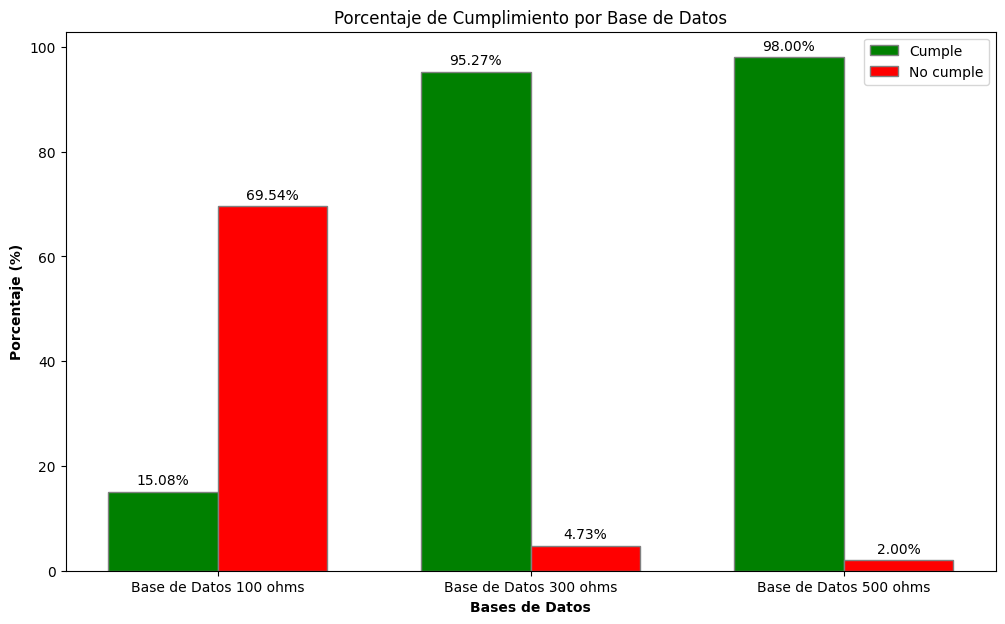

In [ ]:
# Porcentajes de cumplimiento obtenidos
porcentajes = {
    'Base de Datos 100 ohms': {
        'Cumple': porcentaje_cumple_base100,
        'No cumple': porcentaje_no_cumple_base100
    },
    'Base de Datos 300 ohms': {
        'Cumple': porcentaje_cumple_base300,
        'No cumple': porcentaje_no_cumple_base300
    },
    'Base de Datos 500 ohms': {
        'Cumple': porcentaje_cumple_base500,
        'No cumple': porcentaje_no_cumple_base500
    }
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Configuración para las barras
labels = list(porcentajes.keys())
cumple = [valores['Cumple'] for valores in porcentajes.values()]
no_cumple = [valores['No cumple'] for valores in porcentajes.values()]

# Ancho de las barras
bar_width = 0.35

# Posiciones de las barras
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Crear las barras
bars_cumple = ax.bar(r1, cumple, color='green', width=bar_width, edgecolor='grey', label='Cumple')
bars_no_cumple = ax.bar(r2, no_cumple, color='red', width=bar_width, edgecolor='grey', label='No cumple')

# Añadir etiquetas y título
ax.set_xlabel('Bases de Datos', fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontweight='bold')
ax.set_title('Porcentaje de Cumplimiento por Base de Datos')
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(labels)
ax.legend()

# Añadir porcentajes en las barras
for bars in [bars_cumple, bars_no_cumple]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos verticalmente hacia arriba
                    textcoords='offset points',
                    ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

# DESVIACIÓN ESTÁNDAR POR PASO DE INSTRUCTIVO


In [ ]:

# Calcular la desviación estándar para cada fila
desviacion_estandar_filas100 = df_positivo100.std(axis=1)

# Mostrar la desviación estándar de cada fila
print("Desviación estándar por fila:")
print(desviacion_estandar_filas100)

Desviación estándar por fila:
0      7.761374
1     16.556900
2     13.498583
3      9.344458
4     10.967566
5     20.215137
6      1.417668
7      1.832195
8      0.940706
9      2.678091
10     0.674966
11     1.815633
12     0.717282
dtype: float64


In [ ]:

# Calcular la desviación estándar para cada fila
desviacion_estandar_filas300 = df_positivo300.std(axis=1)

# Mostrar la desviación estándar de cada fila
print("Desviación estándar por fila:")
print(desviacion_estandar_filas300)

Desviación estándar por fila:
0     0.810864
1     8.069950
2     1.551956
3     3.281499
4     2.892104
5     5.921520
6     0.667283
7     0.843544
8     2.091849
9     5.731919
10    2.743094
dtype: float64


In [ ]:

# Calcular la desviación estándar para cada fila
desviacion_estandar_filas500 = df_positivo500.std(axis=1)

# Mostrar la desviación estándar de cada fila
print("Desviación estándar por fila:")
print(desviacion_estandar_filas500)

Desviación estándar por fila:
0     0.727141
1     1.641920
2     1.655969
3     1.829863
4     2.093187
5     2.633015
6     2.718130
7     1.899123
8     1.610642
9     1.558578
10    1.681517
11    0.574108
dtype: float64


# Grafico de comportamiento de las desviaciones estándar

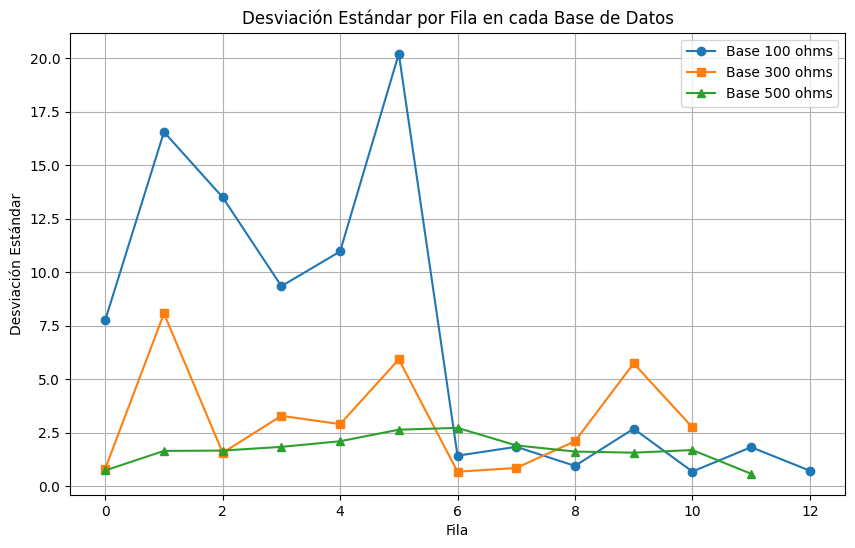

In [ ]:

# Calcular la desviación estándar para cada fila en cada base de datos
desviacion_filas_100 = df_positivo100.std(axis=1)
desviacion_filas_300 = df_positivo300.std(axis=1)
desviacion_filas_500 = df_positivo500.std(axis=1)

# Crear un gráfico para cada base de datos
plt.figure(figsize=(10, 6))

# Graficar las desviaciones estándar para la base de datos de 100 ohms
plt.plot(desviacion_filas_100, label="Base 100 ohms", marker='o')

# Graficar las desviaciones estándar para la base de datos de 300 ohms
plt.plot(desviacion_filas_300, label="Base 300 ohms", marker='s')

# Graficar las desviaciones estándar para la base de datos de 500 ohms
plt.plot(desviacion_filas_500, label="Base 500 ohms", marker='^')

# Añadir etiquetas y título
plt.title("Desviación Estándar por Fila en cada Base de Datos")
plt.xlabel("Fila")
plt.ylabel("Desviación Estándar")
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

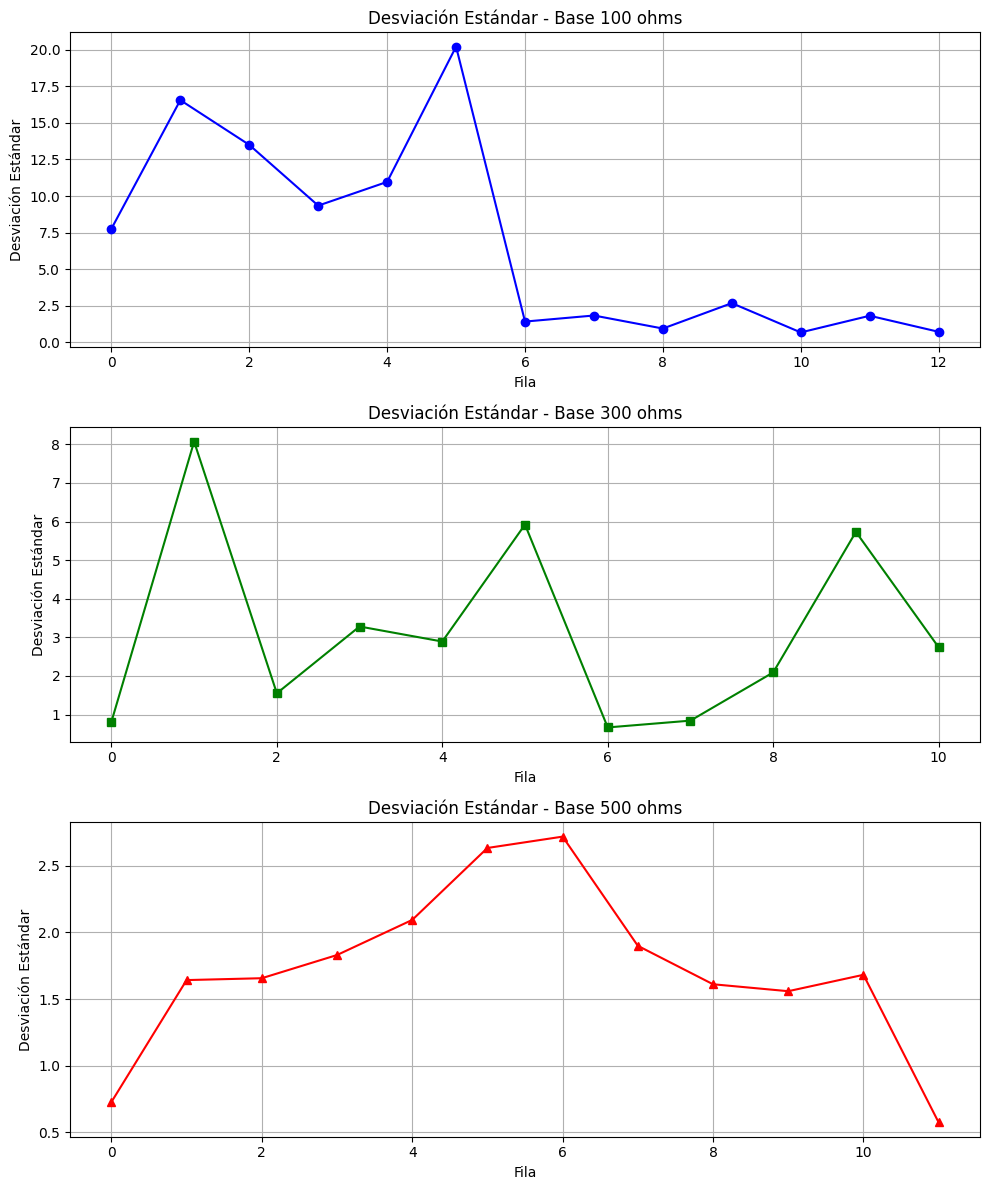

In [ ]:

# Calcular la desviación estándar para cada fila en cada base de datos
desviacion_filas_100 = df_positivo100.std(axis=1)
desviacion_filas_300 = df_positivo300.std(axis=1)
desviacion_filas_500 = df_positivo500.std(axis=1)

# Crear subplots para cada base de datos, en una figura con 3 filas y 1 columna
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Graficar las desviaciones estándar para la base de datos de 100 ohms
axs[0].plot(desviacion_filas_100, label="Base 100 ohms", marker='o', color='b')
axs[0].set_title("Desviación Estándar - Base 100 ohms")
axs[0].set_xlabel("Fila")
axs[0].set_ylabel("Desviación Estándar")
axs[0].grid(True)

# Graficar las desviaciones estándar para la base de datos de 300 ohms
axs[1].plot(desviacion_filas_300, label="Base 300 ohms", marker='s', color='g')
axs[1].set_title("Desviación Estándar - Base 300 ohms")
axs[1].set_xlabel("Fila")
axs[1].set_ylabel("Desviación Estándar")
axs[1].grid(True)

# Graficar las desviaciones estándar para la base de datos de 500 ohms
axs[2].plot(desviacion_filas_500, label="Base 500 ohms", marker='^', color='r')
axs[2].set_title("Desviación Estándar - Base 500 ohms")
axs[2].set_xlabel("Fila")
axs[2].set_ylabel("Desviación Estándar")
axs[2].grid(True)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# PRUEBAS DE NORMALIDAD SHAPIRO Y KOLMOGOROV

# BASE DE DATOS IMPEDANCIA 100

In [ ]:

# Crear un diccionario para almacenar los resultados
resultados_shapiro = {}
resultados_ks = {}

# Realizar las pruebas de normalidad en todas las columnas
for columna in datos3_df.columns:
    # Eliminar valores NaN para evitar errores en las pruebas
    datos_columna = datos3_df[columna].dropna()

    # Prueba de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(datos_columna)
    resultados_shapiro[columna] = {'Estadístico': stat_shapiro, 'p-valor': p_shapiro}

    # Prueba de Kolmogorov-Smirnov
    stat_ks, p_ks = stats.kstest(datos_columna, 'norm', args=(datos_columna.mean(), datos_columna.std(ddof=1)))
    resultados_ks[columna] = {'Estadístico': stat_ks, 'p-valor': p_ks}

# Convertir los resultados en DataFrames para visualización
df_shapiro100 = pd.DataFrame(resultados_shapiro).T
df_ks100 = pd.DataFrame(resultados_ks).T

# Mostrar los resultados de Shapiro-Wilk y Kolmogorov-Smirnov
# Para mostrar los DataFrames simplemente usa:
print(df_shapiro100)
print(df_ks100)

# O si estás en un entorno interactivo como Jupyter:
display(df_shapiro100)
display(df_ks100)

                             Estadístico   p-valor
BIO-14879 Primer semestre       0.845777  0.025137
BIO-14879 segundo semestre      0.811896  0.009471
BIO-14878 primer semestre       0.737335  0.009338
BIO-14878 segundo semestre      0.812867  0.009732
BIO-14920 primer semestre       0.862717  0.041842
BIO-14920 segundo semestre      0.807458  0.008370
BIO-14673 primer semestre       0.871679  0.055084
BIO-14673 segundo semestre      0.833304  0.017430
BIO-14741 primer semestre       0.870091  0.052452
BIO-14741 segundo semestre      0.864158  0.043723
BIO-14735 primer semestre       0.828918  0.020358
BIO-14735 segundo semestre      0.863724  0.043148
BIO-14672 primer semestre       0.858793  0.037139
BIO-14672 segundo semestre      0.780160  0.004000
BIO-14743 primer semestre       0.847837  0.026724
BIO-14743 segundo semestre      0.807050  0.008276
BIO-14669 primer semestre       0.883582  0.079753
BIO-14669 segundo semestre      0.786111  0.004684
BIO-14671 primer semestre      

,Estadístico,p-valor
BIO-14879 Primer semestre,0.845777,0.025137
BIO-14879 segundo semestre,0.811896,0.009471
BIO-14878 primer semestre,0.737335,0.009338
BIO-14878 segundo semestre,0.812867,0.009732
BIO-14920 primer semestre,0.862717,0.041842
BIO-14920 segundo semestre,0.807458,0.008370
BIO-14673 primer semestre,0.871679,0.055084
BIO-14673 segundo semestre,0.833304,0.017430
BIO-14741 primer semestre,0.870091,0.052452
BIO-14741 segundo semestre,0.864158,0.043723


,Estadístico,p-valor
BIO-14879 Primer semestre,0.242102,0.370829
BIO-14879 segundo semestre,0.297792,0.161796
BIO-14878 primer semestre,0.369601,0.229761
BIO-14878 segundo semestre,0.301982,0.150888
BIO-14920 primer semestre,0.224197,0.464277
BIO-14920 segundo semestre,0.275963,0.228892
BIO-14673 primer semestre,0.249195,0.337175
BIO-14673 segundo semestre,0.255304,0.309837
BIO-14741 primer semestre,0.234829,0.407385
BIO-14741 segundo semestre,0.247168,0.346582


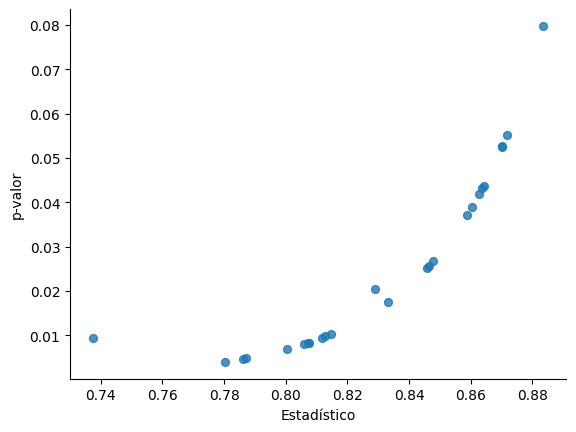

In [ ]:
# @title Estadístico vs p-valor

from matplotlib import pyplot as plt
df_shapiro100.plot(kind='scatter', x='Estadístico', y='p-valor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# BASE DE DATOS IMPEDANCIA 300

In [ ]:

# Crear un diccionario para almacenar los resultados
resultados_shapiro = {}
resultados_ks = {}

# Realizar las pruebas de normalidad en todas las columnas
for columna in datos1_df.columns:
    # Eliminar valores NaN para evitar errores en las pruebas
    datos_columna3 = datos1_df[columna].dropna()

    # Prueba de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(datos_columna3)
    resultados_shapiro[columna] = {'Estadístico': stat_shapiro, 'p-valor': p_shapiro}

    # Prueba de Kolmogorov-Smirnov
    stat_ks, p_ks = stats.kstest(datos_columna3, 'norm', args=(datos_columna3.mean(), datos_columna3.std(ddof=1)))
    resultados_ks[columna] = {'Estadístico': stat_ks, 'p-valor': p_ks}

# Convertir los resultados en DataFrames para visualización
df_shapiro300 = pd.DataFrame(resultados_shapiro).T
df_ks300 = pd.DataFrame(resultados_ks).T

# Mostrar los resultados de Shapiro-Wilk y Kolmogorov-Smirnov
# Para mostrar los DataFrames simplemente usa:
print(df_shapiro300)
print(df_ks300)

# O si estás en un entorno interactivo como Jupyter:
display(df_shapiro300)
display(df_ks300)

                             Estadístico   p-valor
BIO-14879 Primer semestre       0.920747  0.324914
BIO-14879 segundo semestre      0.920747  0.324914
BIO-14878 primer semestre       0.956100  0.722282
BIO-14878 segundo semestre      0.950261  0.647285
BIO-14920 primer semestre       0.933636  0.448792
BIO-14920 segundo semestre      0.946929  0.605007
BIO-14673 primer semestre       0.923750  0.351123
BIO-14673 segundo semestre      0.942451  0.549724
BIO-14741 primer semestre       0.949135  0.632918
BIO-14741 segundo semestre      0.892807  0.150730
BIO-14735 primer semestre       0.736150  0.001372
BIO-14735 segundo semestre      0.946445  0.598933
BIO-14672 primer semestre       0.947385  0.610737
BIO-14672 segundo semestre      0.961132  0.785734
BIO-14743 primer semestre       0.950163  0.646039
BIO-14743 segundo semestre      0.961349  0.788401
BIO-14669 primer semestre       0.943739  0.565395
BIO-14669 segundo semestre      0.954672  0.703958
BIO-14671 primer semestre      

,Estadístico,p-valor
BIO-14879 Primer semestre,0.920747,0.324914
BIO-14879 segundo semestre,0.920747,0.324914
BIO-14878 primer semestre,0.956100,0.722282
BIO-14878 segundo semestre,0.950261,0.647285
BIO-14920 primer semestre,0.933636,0.448792
BIO-14920 segundo semestre,0.946929,0.605007
BIO-14673 primer semestre,0.923750,0.351123
BIO-14673 segundo semestre,0.942451,0.549724
BIO-14741 primer semestre,0.949135,0.632918
BIO-14741 segundo semestre,0.892807,0.150730


,Estadístico,p-valor
BIO-14879 Primer semestre,0.146607,0.945277
BIO-14879 segundo semestre,0.146607,0.945277
BIO-14878 primer semestre,0.140762,0.960313
BIO-14878 segundo semestre,0.123400,0.988503
BIO-14920 primer semestre,0.134412,0.973357
BIO-14920 segundo semestre,0.134668,0.972894
BIO-14673 primer semestre,0.170419,0.854812
BIO-14673 segundo semestre,0.154343,0.920825
BIO-14741 primer semestre,0.134814,0.972630
BIO-14741 segundo semestre,0.156602,0.912725


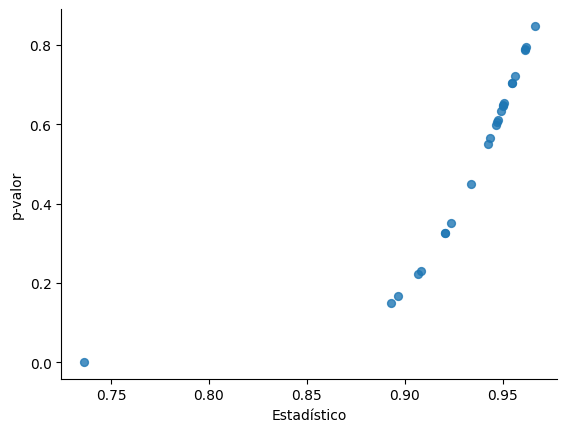

In [ ]:
# @title Estadístico vs p-valor

from matplotlib import pyplot as plt
df_shapiro300.plot(kind='scatter', x='Estadístico', y='p-valor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Base datos impedancia 500

In [ ]:

# Crear un diccionario para almacenar los resultados
resultados_shapiro = {}
resultados_ks = {}

# Realizar las pruebas de normalidad en todas las columnas
for columna in datos2_df.columns:
    # Eliminar valores NaN para evitar errores en las pruebas
    datos_columna5 = datos2_df[columna].dropna()

    # Prueba de Shapiro-Wilk
    stat_shapiro, p_shapiro = stats.shapiro(datos_columna5)
    resultados_shapiro[columna] = {'Estadístico': stat_shapiro, 'p-valor': p_shapiro}

    # Prueba de Kolmogorov-Smirnov
    stat_ks, p_ks = stats.kstest(datos_columna5, 'norm', args=(datos_columna5.mean(), datos_columna5.std(ddof=1)))
    resultados_ks[columna] = {'Estadístico': stat_ks, 'p-valor': p_ks}

# Convertir los resultados en DataFrames para visualización
df_shapiro500 = pd.DataFrame(resultados_shapiro).T
df_ks500 = pd.DataFrame(resultados_ks).T

# Mostrar los resultados de Shapiro-Wilk y Kolmogorov-Smirnov
# Para mostrar los DataFrames simplemente usa:
print(df_shapiro500)
print(df_ks500)

# O si estás en un entorno interactivo como Jupyter:
display(df_shapiro500)
display(df_ks500)

                             Estadístico   p-valor
BIO-14879 Primer semestre       0.930686  0.387436
BIO-14879 segundo semestre      0.896878  0.144563
BIO-14878 primer semestre       0.899207  0.154923
BIO-14878 segundo semestre      0.924589  0.326263
BIO-14920 primer semestre       0.831161  0.021656
BIO-14920 segundo semestre      0.949402  0.628265
BIO-14673 primer semestre       0.912021  0.226443
BIO-14673 segundo semestre      0.912557  0.230042
BIO-14741 primer semestre       0.945485  0.572197
BIO-14741 segundo semestre      0.918206  0.271406
BIO-14735 primer semestre       0.941602  0.519095
BIO-14735 segundo semestre      0.920617  0.291063
BIO-14672 primer semestre       0.922334  0.305845
BIO-14672 segundo semestre      0.941183  0.513547
BIO-14743 primer semestre       0.923558  0.316784
BIO-14743 segundo semestre      0.936159  0.449977
BIO-14669 primer semestre       0.928799  0.367556
BIO-14669 segundo semestre      0.934137  0.426033
BIO-14671 primer semestre      

,Estadístico,p-valor
BIO-14879 Primer semestre,0.930686,0.387436
BIO-14879 segundo semestre,0.896878,0.144563
BIO-14878 primer semestre,0.899207,0.154923
BIO-14878 segundo semestre,0.924589,0.326263
BIO-14920 primer semestre,0.831161,0.021656
BIO-14920 segundo semestre,0.949402,0.628265
BIO-14673 primer semestre,0.912021,0.226443
BIO-14673 segundo semestre,0.912557,0.230042
BIO-14741 primer semestre,0.945485,0.572197
BIO-14741 segundo semestre,0.918206,0.271406


,Estadístico,p-valor
BIO-14879 Primer semestre,0.139168,0.949580
BIO-14879 segundo semestre,0.194852,0.683790
BIO-14878 primer semestre,0.199896,0.653807
BIO-14878 segundo semestre,0.168820,0.829149
BIO-14920 primer semestre,0.174687,0.798661
BIO-14920 segundo semestre,0.169985,0.823242
BIO-14673 primer semestre,0.169520,0.825608
BIO-14673 segundo semestre,0.144383,0.933627
BIO-14741 primer semestre,0.141352,0.943212
BIO-14741 segundo semestre,0.190672,0.708444


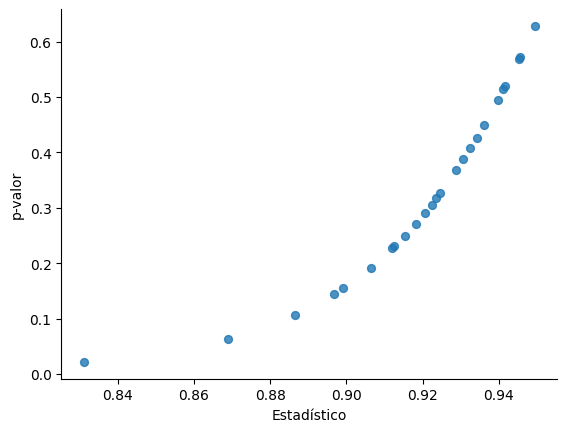

In [ ]:
# @title Estadístico vs p-valor

from matplotlib import pyplot as plt
df_shapiro500.plot(kind='scatter', x='Estadístico', y='p-valor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# INCERTIDUMBRE TIPO A DE LAS MEDICIONES

Incertidumbe tipo A para base 100 ohms


In [ ]:
# Calcular la desviación estándar de los datos en dfpositivo100
desviacion_estandar100 = df_positivo100.std()

# Calcular el número de datos
n_datos100 = len(df_positivo100)

# Dividir la desviación estándar sobre la raíz cuadrada del número de datos
resultado100 = desviacion_estandar100 / np.sqrt(n_datos100)

# Calcular el promedio de los resultados obtenidos
promedio_resultado100 = resultado100.mean()

# Mostrar el promedio
print("Incertidumbre tipo A para base 100ohms:", promedio_resultado100)

Incertidumbre tipo A para base 100ohms: 8.121652327784481


Incertidumbe tipo A para base 300 ohms


In [ ]:
# Calcular la desviación estándar de los datos en dfpositivo100
desviacion_estandar300 = df_positivo300.std()

# Calcular el número de datos
n_datos300 = len(df_positivo300)

# Dividir la desviación estándar sobre la raíz cuadrada del número de datos
resultado300 = desviacion_estandar300 / np.sqrt(n_datos300)

# Calcular el promedio de los resultados obtenidos
promedio_resultado300 = resultado300.mean()

# Mostrar el promedio
print("Incertidumbre tipo A para base 300ohms:", promedio_resultado300)

Incertidumbre tipo A para base 300ohms: 1.8943598273876379


Incertidumbe tipo A para base 500 ohms

In [ ]:
# Calcular la desviación estándar de los datos en dfpositivo100
desviacion_estandar = df_positivo500.std()

# Calcular el número de datos
n_datos = len(df_positivo500)

# Dividir la desviación estándar sobre la raíz cuadrada del número de datos
resultado = desviacion_estandar / np.sqrt(n_datos)

# Calcular el promedio de los resultados obtenidos
promedio_resultado = resultado.mean()

# Mostrar el promedio
print("Incertidumbre tipo A para base 500ohms:", promedio_resultado)

Incertidumbre tipo A para base 500ohms: 0.7697996248589518


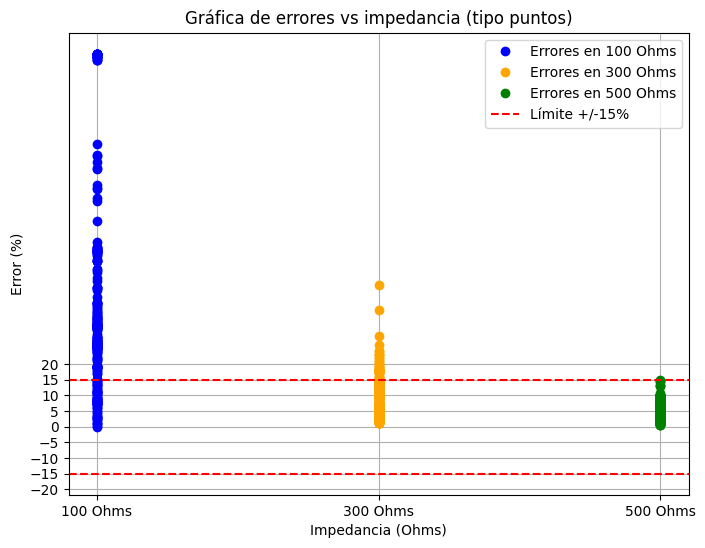

In [ ]:
# Arrays con los valores de error ya definidos
errores_100 = np.array(df_positivo100)   # Errores de la base 100 ohms
errores_300 = np.array(df_positivo300)    # Errores de la base 300 ohms
errores_500 = np.array(df_positivo500)     # Errores de la base 500 ohms

# Valores nominales de impedancia (separadas en el eje X)
impedancias = [0, 0, 0]  # Fijar en 0 para que las líneas de impedancia se centren en el eje X

# Límites de error en el eje Y (±15%)
limite_inferior = -15
limite_superior = 15

# Graficar
plt.figure(figsize=(8, 6))

# Gráficas sin label individual
plt.plot(np.zeros(len(errores_100)), errores_100, 'o', color='blue')
plt.plot(np.zeros(len(errores_300)) + 1, errores_300, 'o', color='orange')
plt.plot(np.zeros(len(errores_500)) + 2, errores_500, 'o', color='green')

# Líneas de límites de error permitidos
plt.axhline(y=limite_inferior, color='red', linestyle='--', label='Límite -15%')
plt.axhline(y=limite_superior, color='red', linestyle='--', label='Límite +15%')

# Crear manualmente los handles para la leyenda
handles = [
    plt.Line2D([0], [0], marker='o', color='blue', label='Errores en 100 Ohms', linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='orange', label='Errores en 300 Ohms', linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='green', label='Errores en 500 Ohms', linestyle='None'),
    plt.Line2D([0], [0], color='red', label='Límite +/-15%', linestyle='--')
]

# Etiquetas y leyenda
plt.xlabel('Impedancia (Ohms)')
plt.ylabel('Error (%)')
plt.title('Gráfica de errores vs impedancia (tipo puntos)')
plt.xticks([0, 1, 2], ['100 Ohms', '300 Ohms', '500 Ohms'])  # Etiquetas de las impedancias en el eje X
plt.yticks(np.arange(limite_inferior - 5, limite_superior + 6, 5))  # Escalado de errores en el eje Y

# Mover la leyenda a un lado
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Agregar la leyenda
plt.legend(handles=handles)

# Mostrar la cuadrícula y la gráfica
plt.grid(True)
plt.show()